In [458]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)
from pytrends import dailydata
from functools import reduce
import numpy as np
from matplotlib import pyplot as plt

### Loading the daily data from google trends by choosing the keywords that can be related to covid crisis

In [279]:
#Loading google trends data daily
start_year=2019
start_month=1
end_year=2020
end_month=10
keywords=['virus','crisis']

keywords=['recession',
          'war',
          'stock market',
          'conflict',
          'terrorism',
          'mortgage',
          'bankrupcy',
          'debt',
          'elections',
          'economy',
          'protest',
          'shooting',
          'food bank',
          'loan']


df_list=[]
for keyword in keywords:
    df_tmp = dailydata.get_daily_data(keyword, start_year, start_month, end_year, end_month, geo = 'US')
    df_list.append(df_tmp[keyword].to_frame())

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), df_list)



recession:2019-01-01 2019-01-31
recession:2019-02-01 2019-02-28
recession:2019-03-01 2019-03-31
recession:2019-04-01 2019-04-30
recession:2019-05-01 2019-05-31
recession:2019-06-01 2019-06-30
recession:2019-07-01 2019-07-31
recession:2019-08-01 2019-08-31
recession:2019-09-01 2019-09-30
recession:2019-10-01 2019-10-31
recession:2019-11-01 2019-11-30
recession:2019-12-01 2019-12-31
recession:2020-01-01 2020-01-31
recession:2020-02-01 2020-02-29
recession:2020-03-01 2020-03-31
recession:2020-04-01 2020-04-30
recession:2020-05-01 2020-05-31
recession:2020-06-01 2020-06-30
recession:2020-07-01 2020-07-31
recession:2020-08-01 2020-08-31
recession:2020-09-01 2020-09-30
recession:2020-10-01 2020-10-31
war:2019-01-01 2019-01-31
war:2019-02-01 2019-02-28
war:2019-03-01 2019-03-31
war:2019-04-01 2019-04-30
war:2019-05-01 2019-05-31
war:2019-06-01 2019-06-30
war:2019-07-01 2019-07-31
war:2019-08-01 2019-08-31
war:2019-09-01 2019-09-30
war:2019-10-01 2019-10-31
war:2019-11-01 2019-11-30
war:2019-1

food bank:2019-04-01 2019-04-30
food bank:2019-05-01 2019-05-31
food bank:2019-06-01 2019-06-30
food bank:2019-07-01 2019-07-31
food bank:2019-08-01 2019-08-31
food bank:2019-09-01 2019-09-30
food bank:2019-10-01 2019-10-31
food bank:2019-11-01 2019-11-30
food bank:2019-12-01 2019-12-31
food bank:2020-01-01 2020-01-31
food bank:2020-02-01 2020-02-29
food bank:2020-03-01 2020-03-31
food bank:2020-04-01 2020-04-30
food bank:2020-05-01 2020-05-31
food bank:2020-06-01 2020-06-30
food bank:2020-07-01 2020-07-31
food bank:2020-08-01 2020-08-31
food bank:2020-09-01 2020-09-30
food bank:2020-10-01 2020-10-31
loan:2019-01-01 2019-01-31
loan:2019-02-01 2019-02-28
loan:2019-03-01 2019-03-31
loan:2019-04-01 2019-04-30
loan:2019-05-01 2019-05-31
loan:2019-06-01 2019-06-30
loan:2019-07-01 2019-07-31
loan:2019-08-01 2019-08-31
loan:2019-09-01 2019-09-30
loan:2019-10-01 2019-10-31
loan:2019-11-01 2019-11-30
loan:2019-12-01 2019-12-31
loan:2020-01-01 2020-01-31
loan:2020-02-01 2020-02-29
loan:2020-03-0

<AxesSubplot:xlabel='date'>

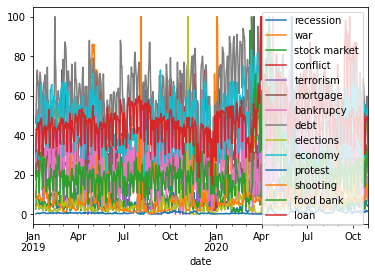

In [280]:
df_merged.plot()

### Loading daily VIX data from yahoo using the API

In [477]:
import yfinance as yf
vix_obj = yf.Ticker("^VIX")
df_market = vix_obj.history(period="max")
df_market=df_market['Close'].to_frame()
df_market.rename(columns={'Close':'VIX'},inplace=True)

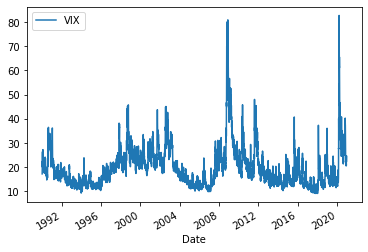

In [478]:
df_market.plot()
keywords=['stock market','mortgage','bankrupcy','loan']
# keywords=['recession',
#           'war',
#           'stock market',
#           'conflict',
#           'terrorism',
#           'mortgage',
#           'bankrupcy',
#           'debt',
#           'elections',
#           'economy',
#           'protest',
#           'shooting',
#           'food bank',
#           'loan']

### As we have access to the daily data, let us merge both dataframes.
# TO DO: check Nan when merging and understand why

In [479]:
# df_vix['VIX_stat']=np.log(df_vix['VIX'])-np.log(df_vix['VIX'].shift(1))
df_trends=df_merged

df_market=pd.merge(df_market,df_trends,how='left',left_index=True,right_index=True)
# df_vix=np.abs(df_vix-df_vix.shift(1))
# df_vix[keywords]=df_vix[keywords].rolling(20).mean()

df_market.dropna(inplace=True)
df_market.index=pd.to_datetime(df_market.index)
df_market=df_market[['VIX'] + keywords]
df_market.index=pd.to_datetime(df_market.index)


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

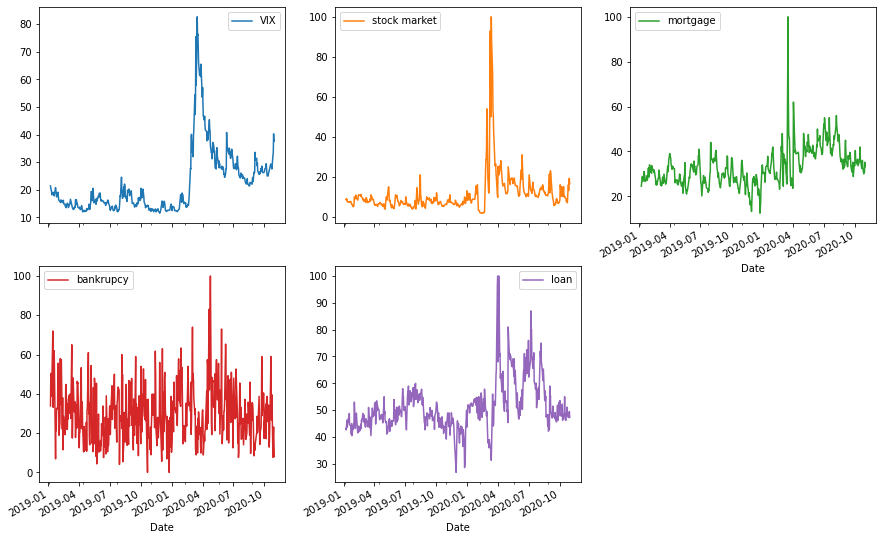

In [480]:
df_market.plot(subplots=True, layout=(3,3),figsize=(15,15))

### AS we can see above, daily Vix data contains a lot of noise due to trading. Hence it is hard to predict daily change of the VIX. Furthermore daily google Trends data is also noisy since searches of keywords depend on various factors (workday or weekend). In order to mititifate this noise we are going to resample the data weekly.
### For VIX taking the last value of the week aswe are interested in predicting the changes, and taking the mean of the week for trends data to reduce the noise

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

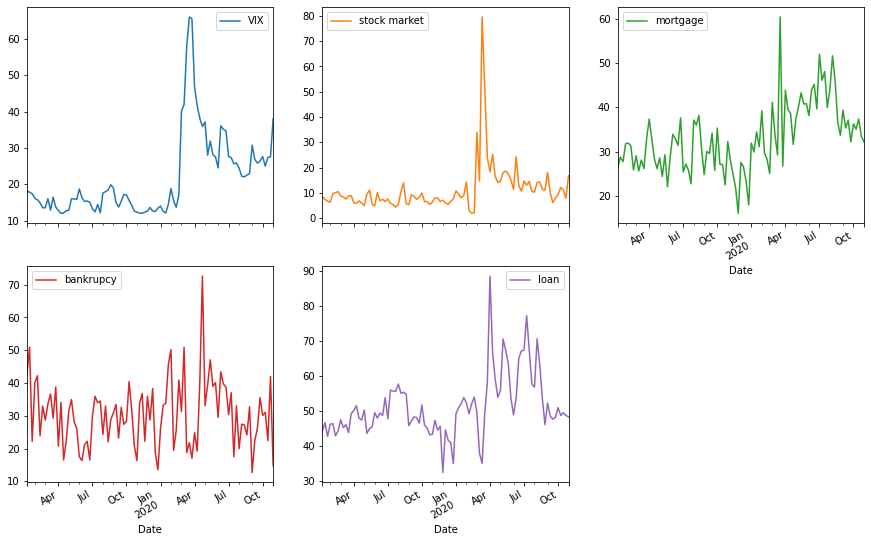

In [481]:
df_vix=df_market['VIX'].resample('1W').last().to_frame()
df_vix[keywords]=df_market[keywords].resample('1W').mean()
df_vix.plot(subplots=True, layout=(3,3),figsize=(15,15))

### The data is less noisy after resampling and to apply timeseries theory we have to check for stationarity. It is obvious that the timeseries are not stationary (tests below). We are going to calculate the log difference and test the stationarity.

In [482]:
from statsmodels.tsa.stattools import adfuller
column_names=df_vix.columns
ADF_pvalues=[adfuller(df_vix[column_name],regression='nc')[1] for column_name in column_names]
df_pvalues = pd.DataFrame(list(zip(column_names, ADF_pvalues)), columns =['Indicators', 'pvalue'])
df_pvalues.round(4)


,Indicators,pvalue
0,VIX,0.5979
1,stock market,0.0329
2,mortgage,0.6063
3,bankrupcy,0.4265
4,loan,0.6177


In [483]:
#Making the timeseries stationary by log difference (most used by practionners)
df_vix=df_vix-df_vix.shift(1)
df_vix.dropna(inplace=True)

column_names=df_vix.columns
ADF_pvalues=[adfuller(df_vix[column_name],regression='nc')[1] for column_name in column_names]
df_pvalues = pd.DataFrame(list(zip(column_names, ADF_pvalues)), columns =['Indicators', 'pvalue'])
df_pvalues.round(5)

,Indicators,pvalue
0,VIX,0.0
1,stock market,0.0
2,mortgage,0.0
3,bankrupcy,0.0
4,loan,0.0


array([[<AxesSubplot:xlabel='VIX', ylabel='VIX'>,
        <AxesSubplot:xlabel='stock market', ylabel='VIX'>,
        <AxesSubplot:xlabel='mortgage', ylabel='VIX'>,
        <AxesSubplot:xlabel='bankrupcy', ylabel='VIX'>,
        <AxesSubplot:xlabel='loan', ylabel='VIX'>],
       [<AxesSubplot:xlabel='VIX', ylabel='stock market'>,
        <AxesSubplot:xlabel='stock market', ylabel='stock market'>,
        <AxesSubplot:xlabel='mortgage', ylabel='stock market'>,
        <AxesSubplot:xlabel='bankrupcy', ylabel='stock market'>,
        <AxesSubplot:xlabel='loan', ylabel='stock market'>],
       [<AxesSubplot:xlabel='VIX', ylabel='mortgage'>,
        <AxesSubplot:xlabel='stock market', ylabel='mortgage'>,
        <AxesSubplot:xlabel='mortgage', ylabel='mortgage'>,
        <AxesSubplot:xlabel='bankrupcy', ylabel='mortgage'>,
        <AxesSubplot:xlabel='loan', ylabel='mortgage'>],
       [<AxesSubplot:xlabel='VIX', ylabel='bankrupcy'>,
        <AxesSubplot:xlabel='stock market', ylabel='bankru

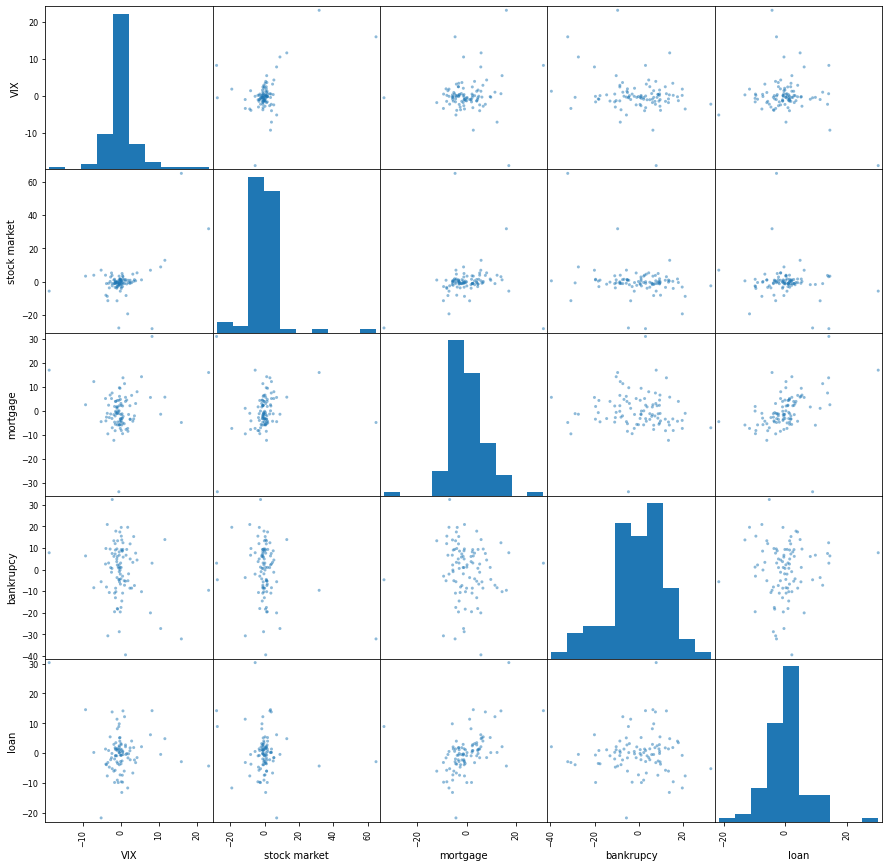

In [484]:
pd.plotting.scatter_matrix(df_vix,figsize=(15,15))

### The log difference successfuly results to stationary timeseries as the pvalues are almost 0

## Overall model

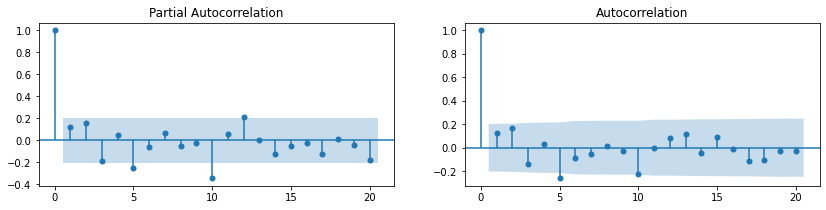

In [485]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig, axs = plt.subplots(1, 2, figsize=(14,3))

plot_pacf(df_vix['VIX'], lags=20, ax=axs[0])
plot_acf(df_vix['VIX'], lags=20, ax=axs[1])
plt.show()

### As we can see from the ACF and PACF, the correlations seems are not statistically significant as the confidence interval is large. Which is normal as we are calculating correlations around a crisis. Let us build an ARMA model using only VIX data to have a baseline to compare when adding Trends data

In [492]:
from statsmodels.tsa.arima.model import ARIMA
model_arma_endo=ARIMA(endog=df_vix['VIX'],order=(2,0,2)).fit()
model_arma_endo.summary()
#(2,0,2) seems to be the best model as all values are statiscally significant, implement gridsearch

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    VIX   No. Observations:                   94
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -270.665
Date:                Thu, 17 Dec 2020   AIC                            553.330
Time:                        11:30:36   BIC                            568.590
Sample:                    01-20-2019   HQIC                           559.494
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2254      0.675      0.334      0.739      -1.098       1.549
ar.L1         -1.2115      0.219     -5.530      0.000      -1.641      -0.782
ar.L2         -0.4739      0.217     -2.186      0.029      -0.899      -0.049
ma.L1          1.3990      0.184      7.590      0.000       1.038       1.760
ma.L2          0.7801      0.174      4.487      0.000       0.439       1.121
sigma2        18.4301      1.902      9.691      0.000      14.703      22.157
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               210.45
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               4.53   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

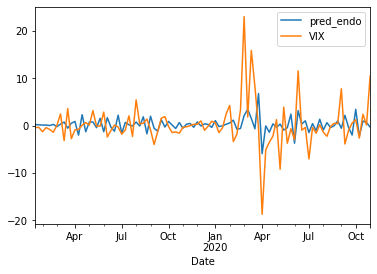

In [493]:
predictions_endo=model_arma_endo.predict()
df_vix['pred_endo']=predictions_endo
df_vix[['pred_endo','VIX']].plot()

### All predictions are insample and we can see that the model is struggling to predict big jumps. It is expected as VIX reacts brutally and considering past values will give us poor predictions.

### Let us add Trends data using a multidimensional VAR model. Below using AIC or BIC we are going to select the order of the VAR model overall

<AxesSubplot:xlabel='VAR order'>

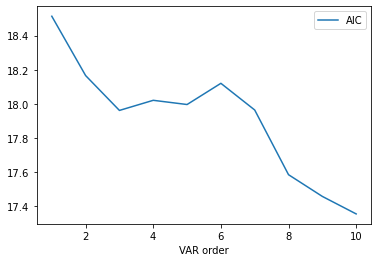

In [498]:
from statsmodels.tsa.api import VAR
model = VAR(df_vix[['VIX']+keywords])

VAR_orders=[1,2,3,4,5,6,7,8,9,10]
aic_values=[model.fit(i).aic for i in VAR_orders]
df_aic_values = pd.DataFrame(list(zip(VAR_orders, aic_values)), columns =['VAR order', 'AIC'])
df_aic_values.set_index('VAR order',inplace=True,drop=True)
df_aic_values.plot()



### In order to avoid overfitting we are going to choose the first minimum which is 3. Hence the Var order we are going to choose is 3

In [499]:
selected_VAR_order=3
model = VAR(df_vix[['VIX']+keywords])
result = model.fit(selected_VAR_order)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 17, Dec, 2020
Time:                     11:45:12
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    20.1692
Nobs:                     91.0000    HQIC:                   18.8523
Log likelihood:          -1382.88    FPE:                6.43769e+07
AIC:                      17.9618    Det(Omega_mle):     2.86430e+07
--------------------------------------------------------------------
Results for equation VIX
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.205884         0.411226            0.501           0.617
L1.VIX                 -0.070297         0.151276           -0.465           0.642
L1.stock market         0.244423         0.073917     

<AxesSubplot:xlabel='Date'>

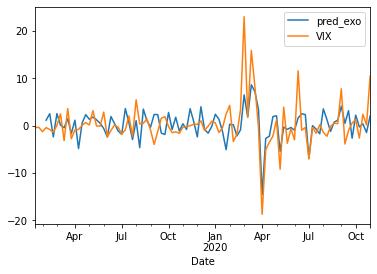

In [500]:
predictions_exo=result.fittedvalues['VIX']
df_vix['pred_exo']=predictions_exo
df_vix[['pred_exo','VIX']].plot()

In [ ]:
from statsmodels.tsa.api import VARMAX
model = VAR(df_vix[['VIX']+keywords],order=(2,2))
result_varmax=model.fit(maxiter=1000, disp=False)
result.summary()


In [ ]:
selected_VAR_order=6
model = VAR(df_vix[['VIX']+keywords])
result = model.fit(selected_VAR_order)
result.summary()

<AxesSubplot:xlabel='Date'>

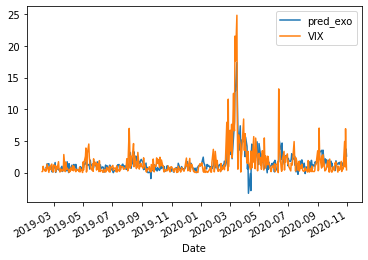

In [405]:
predictions_exo=result.fittedvalues['VIX']
df_vix['pred_exo']=predictions_exo
df_vix[['pred_exo','VIX']].plot()

In [408]:
print(np.mean(np.abs(df_vix['pred_endo']-df_vix['VIX'])))
print(np.mean(np.abs(df_vix['pred_exo']-df_vix['VIX'])))

1.0325931572461633
1.0389703602223048


In [409]:
from tqdm import tqdm
import dask
dask.config.set(scheduler='processes')

@dask.delayed
def compute_ARIMA_endo_pred(df,order,index_insample,rolling_window):
    df_training=df.iloc[index_insample-rolling_window:index_insample]
    outsample=df.iloc[index_insample]
        
    result_fit = ARIMA(endog=df_training['VIX'],order=order).fit()
    result_pred=result_fit.predict(start=len(df_training), end=len(df_training)).values[0]
    return result_pred

@dask.delayed
def compute_ARIMA_exo_pred(df,order, exogenous_regressors, index_insample,rolling_window):
    df_training=df.iloc[index_insample-rolling_window:index_insample]
    outsample=df.iloc[index_insample]
        
    result_fit = ARIMA(endog=df_training['VIX'],order=order,exog=df_training[exogenous_regressors]).fit()
    result_pred=result_fit.predict(start=len(df_training), end=len(df_training),exog=list(outsample[exogenous_regressors])).values[0]
    return result_pred

@dask.delayed
def compute_VAR_exo_pred(df,order, exogenous_regressors, index_insample,rolling_window):
    df_training=df.iloc[index_insample-rolling_window:index_insample]
    outsample=df.iloc[index_insample]
    try:
        result_fit = VAR(df_training).fit(order)
        result_pred=result_fit.forecast(y=df_training.values[-order:],steps=1)[0][0]
    except:
        result_pred=np.nan
    return result_pred

def rolling_ARMA_endo(df, start_window, rolling_window, order=(4,0,3)):
#     df['pred_rolling_endo']=np.nan
    result=[]
    all_results_dask=[compute_ARIMA_endo_pred(df,order,index_insample,rolling_window) for index_insample in np.arange(start_window,len(df))]
    all_results=dask.compute(all_results_dask)
    
    return all_results

def rolling_ARMA_exo(df, start_window, rolling_window, order=(4,0,3), exogenous_regressors=['crisis']):
#     df['pred_rolling_endo']=np.nan
    result=[]
    all_results_dask=[compute_ARIMA_exo_pred(df,order, exogenous_regressors,index_insample,rolling_window) for index_insample in np.arange(start_window,len(df))]
    all_results=dask.compute(all_results_dask)
    
    return all_results
def rolling_VAR_exo(df, start_window, rolling_window, order=4, exogenous_regressors=['crisis']):
#     df['pred_rolling_endo']=np.nan
    result=[]
    all_results_dask=[compute_VAR_exo_pred(df,order, exogenous_regressors,index_insample,rolling_window) for index_insample in np.arange(start_window,len(df))]
    all_results=dask.compute(all_results_dask)
    
    return all_results

# def rolling_ARMA_endo(df, window,order=(4,0,3)):
#     df['pred_rolling_endo']=np.nan
#     result=[]
#     for i in tqdm(np.arange(window,len(df))):
#         df_training=df.iloc[0:i]
#         outsample=df.iloc[i]
        
#         result_fit = ARIMA(endog=df_training['VIX'],order=order).fit()
#         result_pred=result_fit.predict(start=len(df_training), end=len(df_training)).values[0]
#         result.append(result_pred)
# #         df.iloc[i]['pred_rolling_endo']=result_pred
#     df.iloc[window,len(df)]['pred_rolling_endo']=result
#     return df




#Trends model
# def rolling_ARMA_exo(df, window, order=(4,0,3), exogenous_regressors=['crisis']):
#     df['pred_rolling_exo']=np.nan
#     result=[]
#     for i in tqdm(np.arange(window, len(df))):
#         df_training=df.iloc[0:i]
#         outsample=df.iloc[i]
        
#         result_fit=ARIMA(endog=df_training['VIX'],order=order,exog=df_training[exogenous_regressors]).fit()
#         result_pred=result_fit.predict(start=len(df_training), end=len(df_training),exog=outsample[regressor_names]).values[0]
#         df.iloc[i]['pred_rolling_endo']=result_pred
#     df.iloc[window,len(df)]['pred_rolling_exo']=result
#     return df

In [410]:
import warnings
warnings.filterwarnings("ignore")
start_rolling=90
window_rolling=90
pred_list_endo=rolling_ARMA_endo(df_vix, start_rolling,window_rolling, order=(3,0,0))
pred_list_exo=rolling_VAR_exo(df_vix[['VIX']+keywords], start_rolling, window_rolling, order=6, exogenous_regressors=keywords)

In [411]:
df_vix['pred_rolling_endo']=np.nan
df_vix.iloc[start_rolling:len(df_vix)]['pred_rolling_endo']=pred_list_endo[0]

df_vix['pred_rolling_exo']=np.nan
df_vix.iloc[start_rolling:len(df_vix)]['pred_rolling_exo']=pred_list_exo[0]


In [412]:

from sklearn.metrics import mean_absolute_error
df_final=df_vix
df_final.dropna(inplace=True)
baseline_mae = mean_absolute_error(df_final['VIX'], df_final['pred_rolling_endo'])
trends_mae = mean_absolute_error(df_final['VIX'], df_final['pred_rolling_exo'])
improvement = (baseline_mae-trends_mae)/baseline_mae

print(f"MAE of the baseline model: {baseline_mae*100:.2f}%")
print(f"MAE of the trends model: {trends_mae*100:.2f}%")
print(f"MAE improvement: {improvement*100:.2f}%")

MAE of the baseline model: 123.83%
MAE of the trends model: 189.06%
MAE improvement: -52.68%


In [396]:
print(np.mean(np.abs(df_final['VIX']-df_final['pred_rolling_endo'])))
print(np.mean(np.abs(df_final['VIX']-df_final['pred_rolling_exo'])))


1.238281231683941
13.9637715642668


<AxesSubplot:xlabel='Date'>

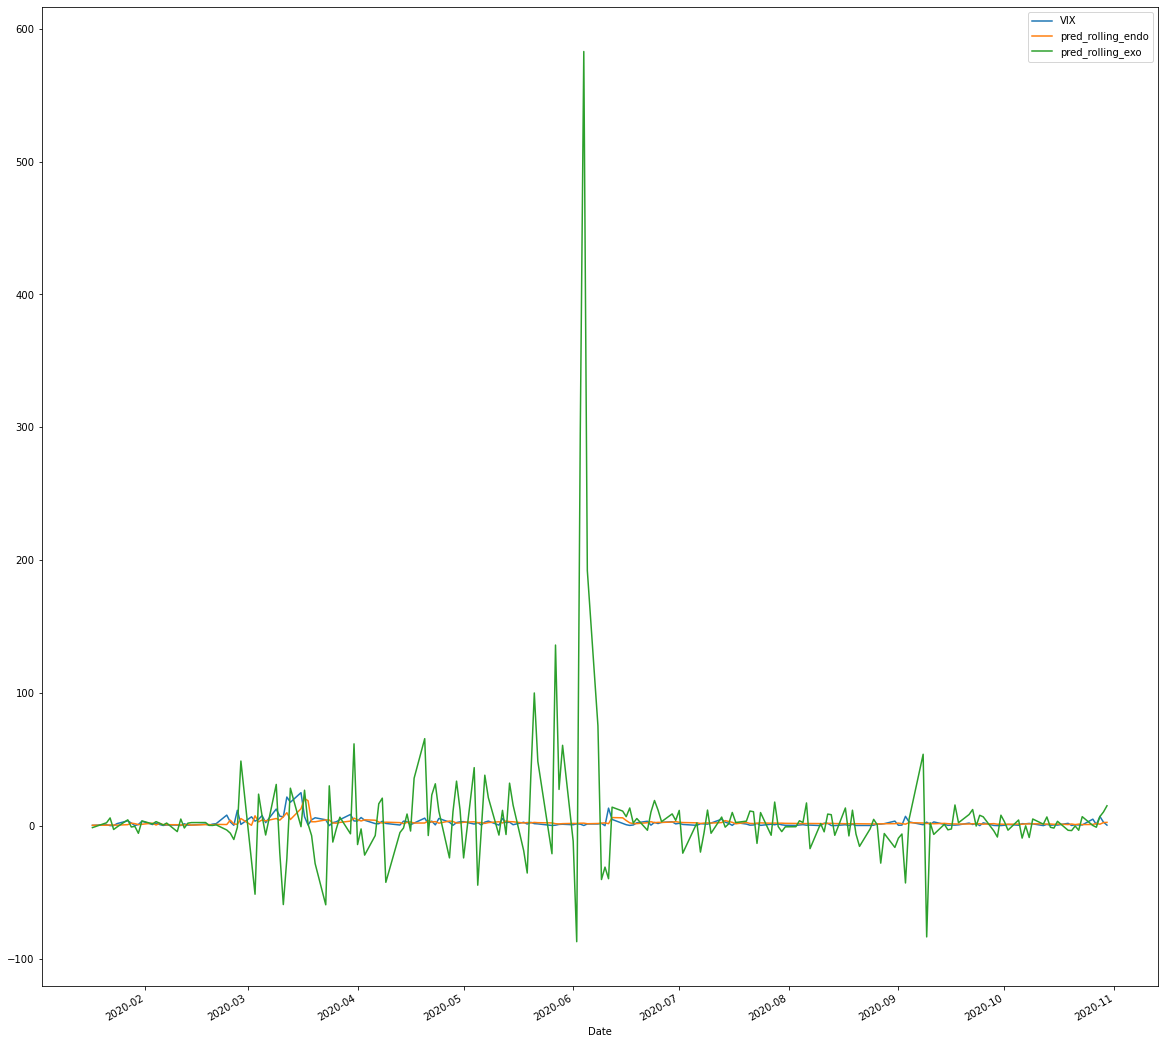

In [397]:
df_vix.iloc[len(df_vix)-200:len(df_vix)][['VIX','pred_rolling_endo','pred_rolling_exo']].plot(figsize=(20,20))

In [278]:
df_vix.describe()

,VIX,virus,crisis,pred_endo,pred_exo,pred_rolling_endo,pred_rolling_exo
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,0.079200,0.002255,-0.022255,0.035865,0.037600,0.067801,0.074962
std,3.408263,4.372808,7.486629,1.344066,1.559107,1.280179,1.474015
min,-17.639999,-28.820000,-33.000000,-7.784410,-7.182874,-4.545553,-11.612551
25%,-1.075000,-0.300000,-2.580000,-0.369725,-0.400039,-0.310557,-0.356474
50%,-0.150000,-0.040000,-0.140000,0.012316,0.029712,0.015715,-0.005666
75%,0.765000,0.180000,2.065000,0.410073,0.488857,0.318983,0.575451
max,24.860001,35.690000,73.760000,10.445945,13.712208,10.632591,6.063717


In [445]:
df_vix['VIX'].resample('1W').last()

Date
2019-01-13    18.190001
2019-01-20    17.799999
2019-01-27    17.420000
2019-02-03    16.139999
2019-02-10    15.720000
                ...    
2020-10-04    27.629999
2020-10-11    25.000000
2020-10-18    27.410000
2020-10-25    27.549999
2020-11-01    38.020000
Freq: W-SUN, Name: VIX, Length: 95, dtype: float64